In [5]:
# 경고(warning) 비표시
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

In [7]:
# %config InlineBackend.figure_format = 'retina'
 
# !apt -qq -y install fonts-nanum
 
# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# plt.rc('font', family='NanumBarunGothic') 
# mpl.font_manager._rebuild()

### 데이터 읽어오기

In [8]:
uselog = pd.read_csv('use_log.csv')
uselog.isnull().sum()

log_id         0
customer_id    0
usedate        0
dtype: int64

In [9]:
customer = pd.read_csv('customer_join.csv')
customer.isnull().sum()

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

In [10]:
uselog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   log_id       197428 non-null  object
 1   customer_id  197428 non-null  object
 2   usedate      197428 non-null  object
dtypes: object(3)
memory usage: 4.5+ MB


In [11]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        4192 non-null   object 
 1   name               4192 non-null   object 
 2   class              4192 non-null   object 
 3   gender             4192 non-null   object 
 4   start_date         4192 non-null   object 
 5   end_date           1350 non-null   object 
 6   campaign_id        4192 non-null   object 
 7   is_deleted         4192 non-null   int64  
 8   class_name         4192 non-null   object 
 9   price              4192 non-null   int64  
 10  campaign_name      4192 non-null   object 
 11  mean               4192 non-null   float64
 12  median             4192 non-null   float64
 13  max                4192 non-null   int64  
 14  min                4192 non-null   int64  
 15  routine_flg        4192 non-null   int64  
 16  calc_date          4192 

In [12]:
customer.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000,4192.000000
mean,0.322042,8559.875954,5.333127,5.250596,7.823950,3.041269,0.814170,18.835878
std,0.467315,1968.128971,1.777533,1.874874,2.168959,1.951565,0.389016,13.848148
min,0.000000,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,6000.000000,4.250000,4.000000,7.000000,2.000000,1.000000,7.000000
50%,0.000000,7500.000000,5.000000,5.000000,8.000000,3.000000,1.000000,15.000000
75%,1.000000,10500.000000,6.416667,6.500000,9.000000,4.000000,1.000000,30.000000
max,1.000000,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [13]:
customer.columns

Index(['customer_id', 'name', 'class', 'gender', 'start_date', 'end_date',
       'campaign_id', 'is_deleted', 'class_name', 'price', 'campaign_name',
       'mean', 'median', 'max', 'min', 'routine_flg', 'calc_date',
       'membership_period'],
      dtype='object')

### 군집분석을 위한 데이터셋 구성

- 5개 차원.. 5개 변수..

In [14]:
customer_clustering = customer[['mean', 'median', 'max', 'min', 'membership_period']]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


### 변수간 최대 최소값 차이를 표준화 (스케일링)
#### StandardScaler, MinMaxScaler

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_clustering_sc = scaler.fit_transform(customer_clustering) #scaler를 거치면 ndarray로 변환
pd.DataFrame(customer_clustering_sc, columns = customer_clustering.columns).head()

,mean,median,max,min,membership_period
0,-0.281206,-0.133676,0.081177,-0.533620,2.034025
1,-0.140545,-0.133676,-0.379928,-0.021149,2.034025
2,-0.421867,-0.133676,-0.841034,-0.021149,2.034025
3,-0.281206,-0.400393,-0.379928,-0.533620,2.034025
4,-0.796964,-0.667109,-0.841034,-1.046090,2.034025


<Axes: xlabel='max', ylabel='Density'>

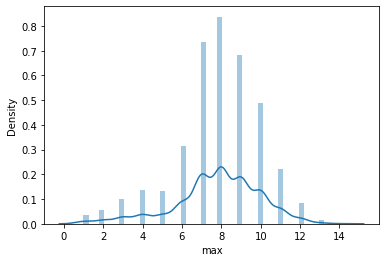

In [16]:
sns.distplot(customer_clustering["max"])

<Axes: xlabel='max', ylabel='Density'>

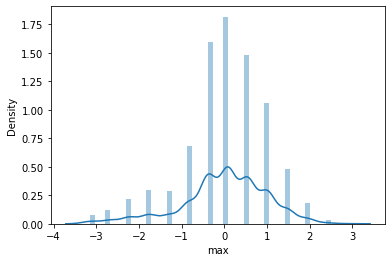

In [17]:
sns.distplot(pd.DataFrame(customer_clustering_sc, columns = customer_clustering.columns)["max"])

### 군집분석을 위해 Kmeans 사용

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 0)

In [19]:
clusters = kmeans.fit(customer_clustering_sc)
customer_clustering["cluster"] = clusters.labels_

In [20]:
customer_clustering.head()

,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,1
1,5.083333,5.0,7,3,47,1
2,4.583333,5.0,6,3,47,1
3,4.833333,4.5,7,2,47,1
4,3.916667,4.0,6,1,47,1


In [21]:
customer_clustering["cluster"].unique()

array([1, 2, 3, 0], dtype=int32)

In [22]:
customer_clustering.cluster.unique()

array([1, 2, 3, 0], dtype=int32)

In [23]:
clusters

KMeans(n_clusters=4, random_state=0)

3    1332
1    1249
0     840
2     771
Name: cluster, dtype: int64
3    0.317748
1    0.297948
0    0.200382
2    0.183922
Name: cluster, dtype: float64


<Axes: ylabel='count'>

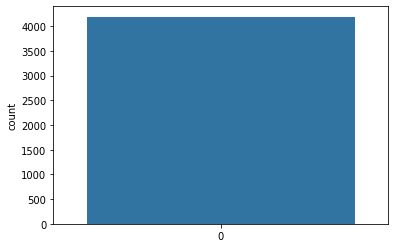

In [24]:
print(customer_clustering.cluster.value_counts())
print(customer_clustering.cluster.value_counts()/len(customer_clustering))
sns.countplot(customer_clustering["cluster"])

In [25]:
customer_clustering.columns = ["월평균값","월중앙값", "월최댓값", "월최솟값","회원기간", "cluster"]
customer_clustering

,월평균값,월중앙값,월최댓값,월최솟값,회원기간,cluster
0,4.833333,5.0,8,2,47,1
1,5.083333,5.0,7,3,47,1
2,4.583333,5.0,6,3,47,1
3,4.833333,4.5,7,2,47,1
4,3.916667,4.0,6,1,47,1
...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1,0
4188,10.000000,10.0,10,10,1,0
4189,8.000000,8.0,8,8,1,0
4190,11.000000,11.0,11,11,1,0


In [26]:
customer_clustering.groupby("cluster").mean()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,8.061942,8.047024,10.014286,6.175000,7.019048
1,4.677561,4.670937,7.233787,2.153723,36.915933
2,3.065504,2.900130,4.783398,1.649805,9.276265
3,5.539535,5.391141,8.756006,2.702703,14.867868


In [27]:
customer_clustering.columns

Index(['월평균값', '월중앙값', '월최댓값', '월최솟값', '회원기간', 'cluster'], dtype='object')

### 시각화를 위해 차원축소
#### PCA

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)   # 5개의 차원을 2개로 축소소 >> 전체 분산이 분해되어서 2개의 차원으로 축소되면서 x,y라고 하는 2차원상의 거리! 로 남게됨.(5개는 고객의 이용특성)
X = customer_clustering_sc
x_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df.head()

,0,1
0,-0.819982,-1.959097
1,-0.707922,-1.799857
2,-1.061499,-1.659826
3,-1.160764,-1.810139
4,-2.017132,-1.670101


In [29]:
pca_df.shape

(4192, 2)

In [30]:
pca_df["cluster"] = customer_clustering["cluster"] 
pca_df.head()

,0,1,cluster
0,-0.819982,-1.959097,1
1,-0.707922,-1.799857,1
2,-1.061499,-1.659826,1
3,-1.160764,-1.810139,1
4,-2.017132,-1.670101,1


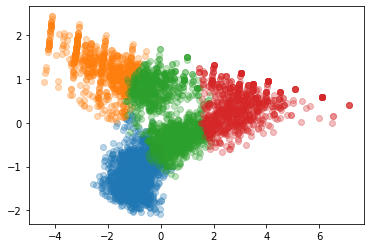

In [31]:
for i in pca_df["cluster"].unique():
  tmp = pca_df.loc[pca_df["cluster"]==i]
  plt.scatter(tmp[0], tmp[1], alpha = 0.3)

In [32]:
customer_clustering = pd.concat([customer_clustering, customer], axis = 1)
customer_clustering.head()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간,cluster,customer_id,name,class,gender,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,4.833333,5.0,8,2,47,1,OA832399,XXXX,C01,F,...,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,5.083333,5.0,7,3,47,1,PL270116,XXXXX,C01,M,...,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,4.583333,5.0,6,3,47,1,OA974876,XXXXX,C01,M,...,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,4.833333,4.5,7,2,47,1,HD024127,XXXXX,C01,F,...,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,3.916667,4.0,6,1,47,1,HD661448,XXXXX,C03,F,...,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [33]:
customer_clustering.columns

Index(['월평균값', '월중앙값', '월최댓값', '월최솟값', '회원기간', 'cluster', 'customer_id',
       'name', 'class', 'gender', 'start_date', 'end_date', 'campaign_id',
       'is_deleted', 'class_name', 'price', 'campaign_name', 'mean', 'median',
       'max', 'min', 'routine_flg', 'calc_date', 'membership_period'],
      dtype='object')

### 군집을 기반으로 속성 분석

In [34]:
customer_clustering.groupby(["cluster","is_deleted"],as_index=False).count()[["cluster","is_deleted","customer_id"]]

,cluster,is_deleted,customer_id
0,0,0,821
1,0,1,19
2,1,0,1231
3,1,1,18
4,2,1,771
5,3,0,790
6,3,1,542


In [35]:
sns.catplot("cluster",kind="count", hue="is_deleted", data=customer_clustering)

TypeError: ignored

In [ ]:
customer_clustering.groupby(["cluster","routine_flg"],as_index=False).count()[["cluster","routine_flg","customer_id"]]

In [ ]:
sns.catplot("cluster",kind="count", hue="routine_flg", data=customer_clustering)

In [ ]:
sns.catplot("cluster",kind="count", hue="campaign_name", data=customer_clustering)

In [ ]:
sns.catplot("cluster",kind="count", hue="class", data=customer_clustering)

### 선형회귀 사용을 위한 데이터 준비

In [ ]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])  #usedate를 날짜형으로 변환
uselog["연월"] = uselog["usedate"].dt.strftime("%Y%m") #연월 컬럼에 usedate의 연월데[이터를 입력]

In [ ]:
uselog_months = uselog.groupby(["연월","customer_id"],as_index=False).count()
uselog_months.head()

In [ ]:
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"]
uselog_months.head()

In [ ]:
uselog_months.shape

In [ ]:
year_months = list(uselog_months["연월"].unique())  #201804~201903 12개의 데이터가 담긴 리스트
year_months

In [ ]:
predict_data = pd.DataFrame()

In [ ]:
for i in range(6, len(year_months)): # 6-11 까지 6번 반복
    tmp = uselog_months.loc[uselog_months["연월"]==year_months[i]] # i=6 (201810의 모든 데이터)
    tmp.rename(columns={"count":"count_pred"}, inplace=True) # uselog_months 데이터 중 10월 데이터-count를 count_pred 변경
    for j in range(1, 7):   # 1-6 까지 6번 반복
        tmp_before = uselog_months.loc[uselog_months["연월"]==year_months[i-j]] # i-j=5, 9월 데이터 가져오기
        del tmp_before["연월"] # 연월 제거: customer_id, count 남음|
        tmp_before.rename(columns={"count":"count_{}".format(j-1)}, inplace=True) #count 컬럼은 컬럼명을 (j-1)=count_0로 변경
        tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left") # 1달 데이터를 customer_id를 기준으로 tmp에 병합
    predict_data = pd.concat([predict_data, tmp], ignore_index=True) 

In [ ]:
predict_data.head()

In [ ]:
predict_data.shape

In [ ]:
predict_data = predict_data.dropna()
predict_data = predict_data.reset_index(drop=True)
predict_data

In [ ]:
predict_data = pd.merge(predict_data, customer[["customer_id","start_date"]], on="customer_id", how="left")
predict_data.head()

In [ ]:
predict_data["now_date"] = pd.to_datetime(predict_data["연월"], format="%Y%m")
predict_data["start_date"] = pd.to_datetime(predict_data["start_date"])
predict_data.head()

In [ ]:
from dateutil.relativedelta import relativedelta
predict_data["period"] = None
for i in range(len(predict_data)): #0 - 15112까지 15113회 반복
    delta = relativedelta(predict_data["now_date"][i], predict_data["start_date"][i])
    predict_data["period"][i] = delta.years*12 + delta.months
predict_data.head()

In [ ]:
predict_data.dtypes

In [ ]:
predict_data["period"] = predict_data["period"].astype("int")
predict_data.dtypes

In [ ]:
predict_data.shape

In [ ]:
predict_data = predict_data.loc[predict_data["start_date"]>=pd.to_datetime("20180401")]
predict_data

### 완완성된 데이터에서 독립변수와 종속변수 분리

In [ ]:
X = predict_data[["count_0","count_1","count_2","count_3","count_4","count_5","period"]]
y = predict_data["count_pred"]

### 훈련데이터와 테스트데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 42)

### 선형회귀 모델 적용

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
np.hstack((np.array(y_pred).reshape(-1,1),np.array(y_test).reshape(-1,1)))[0:5]

In [ ]:
## 평균 오차 측정
## 제곱근 평균 제곱 오차(RMSE)
## 평균 절대값 오차(MAE)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
print("RMSE = {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("MAE = {}".format(mean_absolute_error(y_test, y_pred)))

In [ ]:
coef = pd.DataFrame({"feature_names":X.columns, "coefficient":lr.coef_})
coef

In [ ]:
# DecisionTree(의사결정나무)알고리즘 사용용

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 5)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

In [ ]:
y_pred = dt.predict(X_test)
print("RMSE = {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("MAE = {}".format(mean_absolute_error(y_test, y_pred)))

In [ ]:
# RandomForest 알고리즙 사용용

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 4)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

In [ ]:
y_pred = rf.predict(X_test)
print("RMSE = {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("MAE = {}".format(mean_absolute_error(y_test, y_pred)))

In [ ]:
pd.DataFrame({"feature_names":X.columns, "feature_importances":dt.feature_importances_})

In [ ]:
pd.DataFrame({"feature_names":X.columns, "feature_importances":rf.feature_importances_})

In [ ]:
x1 = [3, 4, 4, 6, 8, 7, 12]
x2 = [2, 2, 3, 3, 4, 6, 6]
x_pred = [x1, x2]

In [ ]:
lr.predict(x_pred)

In [ ]:
dt.predict(x_pred)

In [ ]:
rf.predict(x_pred)

In [ ]:
x1 = [8.0,9.0	,6.0,8.0,7.0,5.0,8]
x2 = [3.0,3.0,3.0,5.0,6.0,9.0,5]
x_pred = [x1, x2]
rf.predict(x_pred)

In [ ]:
y[[13412,12251]]	

In [ ]:
from keras import models
from keras import layers

In [ ]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  return model

In [ ]:
model = build_model()
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
model.summary()

In [ ]:
X_train = X_train.astype('int32')

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, callbacks=[early_stop])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel('epoch')
plt.ylabel('mae')
plt.legend(loc='best')
plt.ylim([1.2, 1.7])
plt.show()

In [ ]:
X_test = X_test.astype('int32')

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test)

In [ ]:
print(np.round(np.array(y_test[:10])).flatten())

test_predictions = np.round(model.predict(X_test[:10])).flatten()
print(test_predictions)

In [ ]:
print(np.array(y_test[:10]).flatten())

test_predictions = np.round(lr.predict(X_test[:10])).flatten()
print(test_predictions)